# Final Project: CNN

# Importing Python Libraries

In [36]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input, Dropout, MaxPool2D



# Load dataset

In [37]:
dataset = pd.read_csv("AAPL.csv")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2023,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
1,1/5/2023,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
2,1/6/2023,126.010002,130.289993,124.889999,129.619995,128.899521,87754700
3,1/9/2023,130.470001,133.410004,129.889999,130.149994,129.426575,70790800
4,1/10/2023,130.259995,131.259995,128.119995,130.729996,130.003342,63896200
...,...,...,...,...,...,...,...
233,12/7/2023,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
234,12/8/2023,194.199997,195.990005,193.669998,195.710007,195.710007,53377300
235,12/11/2023,193.110001,193.490005,191.419998,193.179993,193.179993,60943700
236,12/12/2023,193.080002,194.720001,191.720001,194.710007,194.710007,52696900


# Train, Validation and Test Sets Split

In [53]:

# Definig window size
window_size = 34  # For example, 34 days

# Function to create windowed data
def create_windows(X, Y, window_size):
    X_windows, Y_windows = [], []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i + window_size])
        Y_windows.append(Y[i + window_size])
    return np.array(X_windows), np.array(Y_windows)

X = np.asarray(dataset[['Open', 'High', 'Low', 'Volume']])
Y = np.asarray(dataset['Close'])

# Create windowed sequences
X_windowed, Y_windowed = create_windows(X, Y, window_size)


# Then, we split our data into train/val/test sets
train_split = int(0.5*Y_windowed.size)
val_split = int(0.75*Y_windowed.size)

X_train = X_windowed[:train_split,:]
Y_train = Y_windowed[:train_split]

X_val = X_windowed[train_split:val_split,:]
Y_val = Y_windowed[train_split:val_split]

X_test = X_windowed[val_split:,:]
Y_test = X_windowed[val_split:]

print("X_train.shape = ",X_train.shape)
print("Y_train.shape = ",Y_train.shape)

X_train.shape =  (102, 34, 4)
Y_train.shape =  (102,)


# Data Normalization

In [54]:
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


# Convolutional Neural Network

In [58]:

def my_CNN_Model(k=1, lr=0.15):
    
    my_shape = (34,4)
    model_input = Input(shape = my_shape)
    l1 = Conv1D(32,3, padding='same', activation='relu')(model_input)
    l2 = Conv1D(32,3, padding='same', activation='relu')(l1)
    l2_drop =Dropout(0.25)(l2)
    l3 = Conv1D(64,3, padding='same', activation='relu')(l2_drop)
    l3_drop = Dropout(0.25)(l3)
    out = Dense(1,activation = 'relu')(l3_drop)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [59]:
model = my_CNN_Model()
print(model.summary())


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 34, 4)]           0         
                                                                 
 conv1d_26 (Conv1D)          (None, 34, 32)            416       
                                                                 
 conv1d_27 (Conv1D)          (None, 34, 32)            3104      
                                                                 
 dropout_15 (Dropout)        (None, 34, 32)            0         
                                                                 
 conv1d_28 (Conv1D)          (None, 34, 64)            6208      
                                                                 
 dropout_16 (Dropout)        (None, 34, 64)            0         
                                                                 
 dense_6 (Dense)             (None, 34, 1)             65 

In [60]:
my_batch_size = 50
my_epochs = 10


history = model.fit(X_train, Y_train, batch_size = my_batch_size, epochs = my_epochs,
          verbose = 1,validation_data=(X_val,Y_val))

Epoch 1/10

3/3 [==============================] - 1s 146ms/step - loss: 29388.7305 - val_loss: 32663.1191
Epoch 2/10
3/3 [==============================] - 0s 20ms/step - loss: 29329.4160 - val_loss: 32534.4551
Epoch 3/10
3/3 [==============================] - 0s 20ms/step - loss: 29249.1074 - val_loss: 32350.9492
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: 29130.3457 - val_loss: 32082.6992
Epoch 5/10
3/3 [==============================] - 0s 19ms/step - loss: 28973.3340 - val_loss: 31691.6074
Epoch 6/10
3/3 [==============================] - 0s 21ms/step - loss: 28738.7578 - val_loss: 31141.0703
Epoch 7/10
3/3 [==============================] - 0s 20ms/step - loss: 28397.5645 - val_loss: 30340.9434
Epoch 8/10
3/3 [==============================] - 0s 19ms/step - loss: 27926.4062 - val_loss: 29249.1797
Epoch 9/10
3/3 [==============================] - 0s 18ms/step - loss: 27276.9785 - val_loss: 27818.5762
Epoch 10/10
3/3 [==============================] - 0s

In [61]:
test_accuracy = model.evaluate(X_test,Y_test)
print(test_accuracy)

2/2 [==============================] - 0s 12ms/step - loss: 861136916316160.0000
861136916316160.0


In [62]:
predictedStockPrice = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


(51,)
(51,)


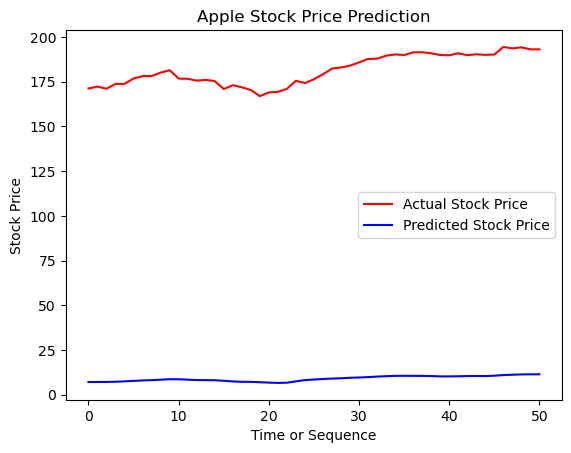

In [78]:
# Flatten the predictedStockPrice to match Y_test
# Assuming the prediction you want is the last value in each window
flattenedPredictions = predictedStockPrice[:, -1, 0]
flattenedY = Y_test[:, -1, 0]
print(flattenedY .shape)
print(flattenedPredictions.shape)
# Plotting
plt.plot(flattenedY, color='red', label="Actual Stock Price")
plt.plot(flattenedPredictions, color='blue', label="Predicted Stock Price")
plt.title("Apple Stock Price Prediction")
plt.xlabel('Time or Sequence')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
